In [1]:
from flash_ansr import FlashANSR, GenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
MODEL = "psaegert/flash-ansr-v21.0-60M"

In [4]:
install_model(MODEL)

Installing model psaegert/flash-ansr-v21.0-60M to /home/psaegert/Projects/flash-ansr/models/psaegert/flash-ansr-v21.0-60M


Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

Model psaegert/flash-ansr-v21.0-60M installed successfully!


In [10]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    # generation_config=GenerationConfig(method='beam_search', beam_width=1024 * 32, equivalence_pruning=True),
    # generation_config=GenerationConfig(method='softmax_sampling', choices=1024 * 32 * 4, max_len=32),
    generation_config=GenerationConfig(method='mcts', beam_width=1024, simulations=1024 * 32, temperature=1),
    parsimony=0.02
).to(device)

In [6]:
widget = ScatterWidget()
widget

ScatterWidget()

In [8]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [11]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 19/19 [00:00<00:00, 511.08it/s]


In [12]:
nsr.compile_results(parsimony=0.02)

In [13]:
nsr.get_expression(0)

'0.01 * (-468.71 - x1 * (-12.97 + x1) / (-0.54 / (x1 - (11.91 + 2.43 * x1))))'

In [14]:
nsr.results

,log_prob,fvu,score,expression,complexity,target_complexity,numeric_prediction,raw_beam,beam,raw_beam_decoded,function,refiner,beam_id,fit_constants,fit_covariances,fit_loss
0,-34.483194,0.003099,-2.128809,"[*, <constant>, -, <constant>, *, x1, /, +, <c...",19,None,None,"[1, 17, 6, 16, 6, 17, 47, 18, 15, 6, 47, 18, 6...","[17, 6, 16, 6, 17, 47, 18, 15, 6, 47, 18, 6, 1...","[*, <constant>, -, <constant>, *, x1, /, +, <c...",<function <lambda> at 0x7fdb781f8860>,"Refiner(expression=['*', '<constant>', '-', '<...",0,"[0.008055094440071527, -468.7102993198094, -12...","[[48395145.940004334, 2813869228437.915, -23.2...",0.158326
1,-17.395181,0.005930,-1.906955,"[*, <constant>, +, <constant>, *, <constant>, ...",16,None,None,"[1, 17, 6, 15, 6, 17, 6, 17, 16, 47, 6, 32, 17...","[17, 6, 15, 6, 17, 6, 17, 16, 47, 6, 32, 17, 6...","[*, <constant>, +, <constant>, *, <constant>, ...",<function <lambda> at 0x7fdb78f7c4a0>,"Refiner(expression=['*', '<constant>', '+', '<...",1,"[-1.2811269968678398, -7.571625560947394, 1.54...","[[2235182303144.3467, -13210215107871.06, 2693...",0.302974
2,-8.223286,0.017759,-1.470580,"[+, <constant>, +, x1, *, +, <constant>, x1, c...",14,None,None,"[1, 15, 6, 15, 47, 17, 15, 6, 47, 32, 16, 6, 1...","[15, 6, 15, 47, 17, 15, 6, 47, 32, 16, 6, 17, ...","[+, <constant>, +, x1, *, +, <constant>, x1, c...",<function <lambda> at 0x7fdb82cdd940>,"Refiner(expression=['+', '<constant>', '+', 'x...",2,"[2.206853623466327, -6.706364223955632, 0.4520...","[[0.03806025323866489, 0.004787841313798806, -...",0.907362
3,-13.753834,0.019295,-1.434555,"[-, <constant>, *, -, x1, <constant>, /, -, <c...",14,None,None,"[1, 16, 6, 17, 16, 47, 6, 18, 16, 6, 19, 15, 6...","[16, 6, 17, 16, 47, 6, 18, 16, 6, 19, 15, 6, 4...","[-, <constant>, *, -, x1, <constant>, /, -, <c...",<function <lambda> at 0x7fdb82cdc5e0>,"Refiner(expression=['-', '<constant>', '*', '-...",3,"[0.14629621888513428, 1.7272029917008798, 11.0...","[[608655872264.4863, 169160535318.70752, -9033...",0.985838
4,-17.537283,0.024446,-1.411785,"[*, <constant>, sin, -, <constant>, /, +, <con...",10,None,None,"[1, 17, 6, 31, 16, 6, 18, 15, 6, 47, 6, 2]","[17, 6, 31, 16, 6, 18, 15, 6, 47, 6]","[*, <constant>, sin, -, <constant>, /, +, <con...",<function <lambda> at 0x7fdb82cdea20>,"Refiner(expression=['*', '<constant>', 'sin', ...",4,"[10.260801915848829, -23.059741460507794, -31....","[[3.8633145884946813, 3828933.0383663536, -135...",1.249040
5,-18.803500,0.024446,-1.411785,"[*, <constant>, sin, *, <constant>, +, <consta...",10,None,None,"[1, 17, 6, 31, 17, 6, 15, 6, 17, 6, 47, 2]","[17, 6, 31, 17, 6, 15, 6, 17, 6, 47]","[*, <constant>, sin, *, <constant>, +, <consta...",<function <lambda> at 0x7fdb82cdfd80>,"Refiner(expression=['*', '<constant>', 'sin', ...",5,"[-10.260806712379527, 0.6558193405585092, 0.74...","[[0.16181823467581943, -119914.89017374093, 13...",1.249040
6,-29.906846,0.388430,-0.050688,"[*, <constant>, -, <constant>, *, <constant>, ...",18,None,None,"[1, 17, 6, 16, 6, 17, 6, 17, 47, 15, 6, 18, 19...","[17, 6, 16, 6, 17, 6, 17, 47, 15, 6, 18, 19, 1...","[*, <constant>, -, <constant>, *, <constant>, ...",<function <lambda> at 0x7fdb78f7f920>,"Refiner(expression=['*', '<constant>', '-', '<...",6,"[0.013892718201307871, -76.22943986913296, -0....","[[14358071730.317255, 78782838828034.8, 348413...",19.846011
7,-7.355222,0.692560,0.080457,"[-, <constant>, *, -, <constant>, x1, cos, *, ...",12,None,None,"[1, 16, 6, 17, 16, 6, 47, 32, 17, 6, 15, 6, 47...","[16, 6, 17, 16, 6, 47, 32, 17, 6, 15, 6, 47]","[-, <constant>, *, -, <constant>, x1, cos, *, ...",<function <lambda> at 0x7fdb78f7dc60>,"Refiner(expression=['-', '<constant>', '*', '-...",7,"[-0.6407264720801947, -0.5898511627685222, 0.8...","[[1.2376848131210119, 0.4289223784139229, -0.0...",35.384911
8,-16.285525,0.838281,0.083390,"[*, <constant>, sin, -, <constant>, *, <consta...",8,None,None,"[1, 17, 6, 31, 16, 6, 17, 6, 47, 2]","[17, 6, 31, 16, 6, 17, 6, 47]","[*, <constant>, sin, -, <constant>, *, <co

In [15]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [16]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

In [17]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

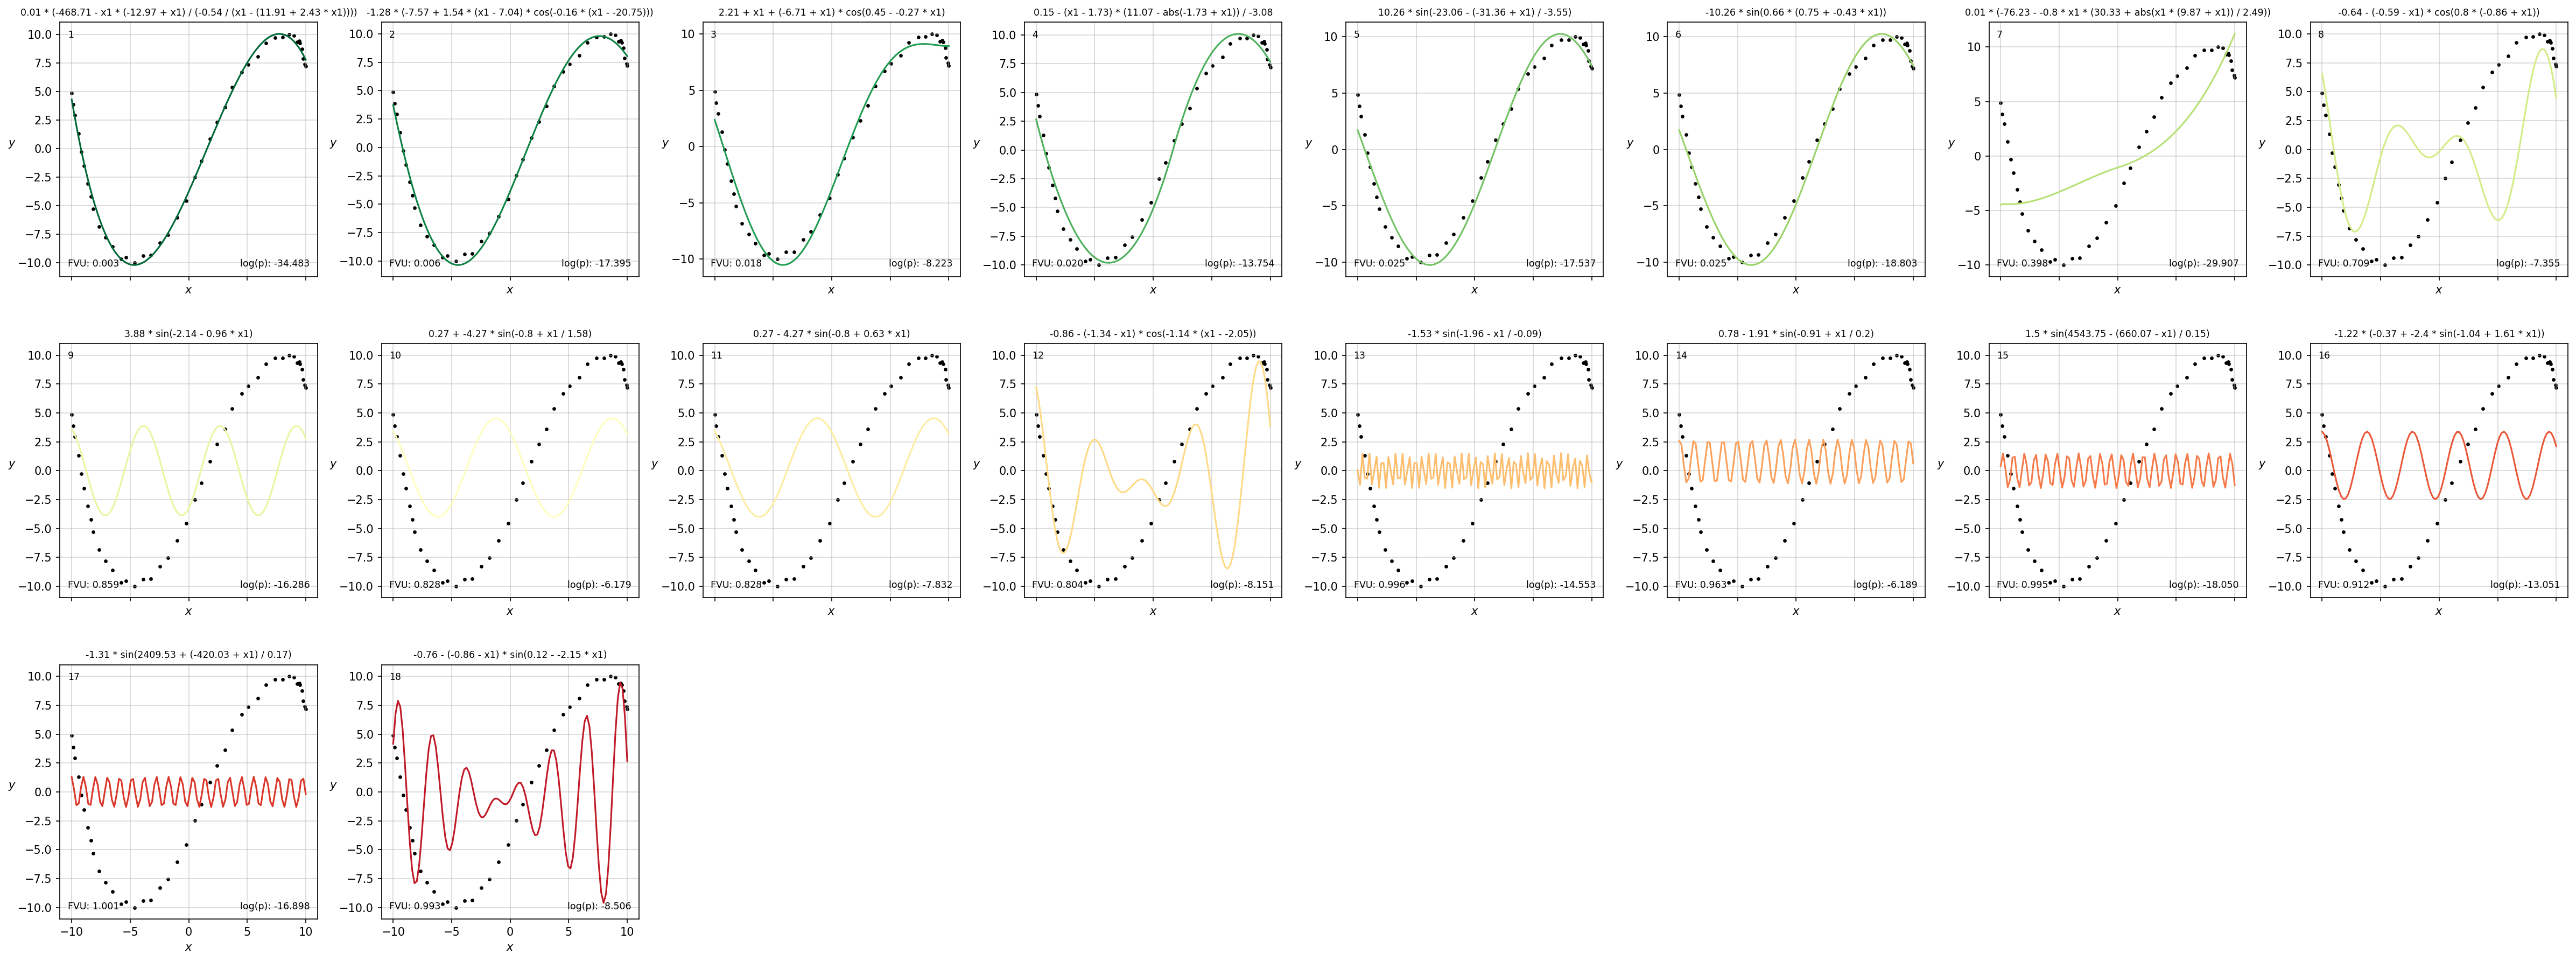

In [18]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)

Text(0, 0.5, 'Log Probability')

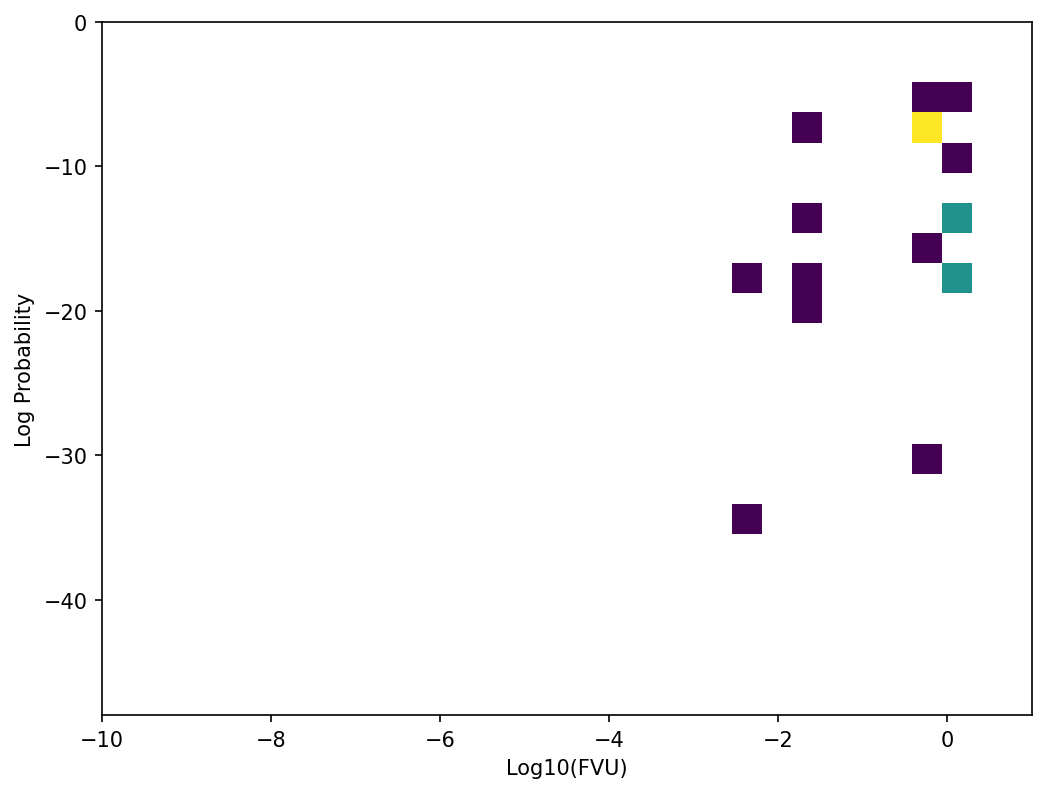

In [19]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-10, 1, 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Log Probability')

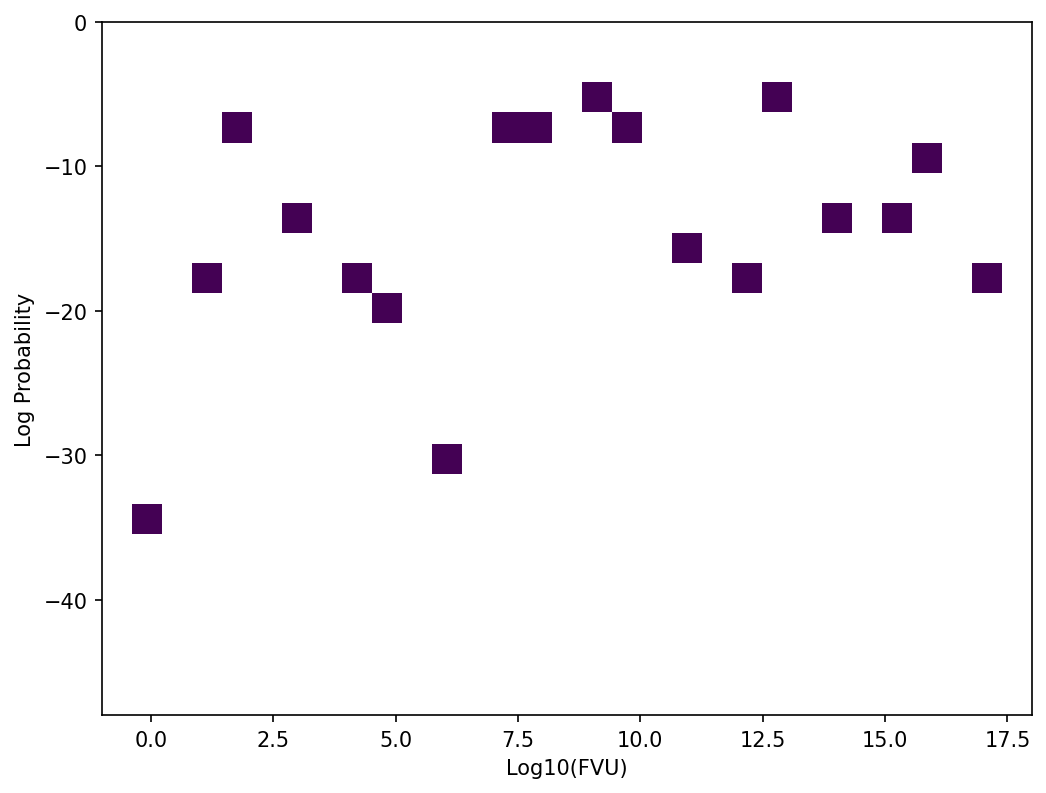

In [20]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.argsort(nsr.results['fvu']), nsr.results['log_prob'], bins=(np.linspace(-1, len(nsr.results), 32), np.linspace(-48, 0, 24)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Log Probability')

Text(0, 0.5, 'Complexity')

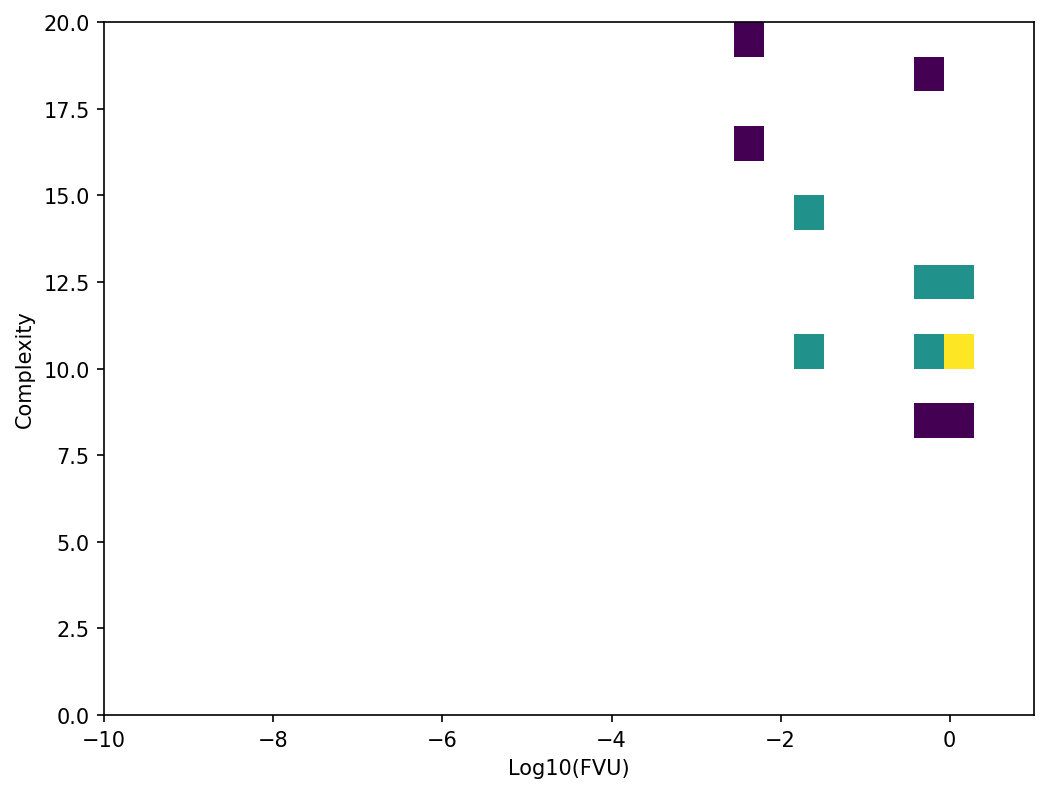

In [21]:
# plot the fvu against the complexity
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist2d(np.log10(nsr.results['fvu']), nsr.results['complexity'], bins=(np.linspace(-10, 1, 32), np.linspace(0, 20, 21)), cmin=1);
ax.set_xlabel('Log10(FVU)')
ax.set_ylabel('Complexity')